In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_books = pd.read_csv('Books.csv')
data_users = pd.read_csv('Users.csv')
data_ratings = pd.read_csv('Ratings.csv')

In [3]:
print(f"Books data {data_books.shape}")
print(f"Users data {data_users.shape}")
print(f"Ratings data {data_ratings.shape}")

Books data (271360, 8)
Users data (278858, 3)
Ratings data (1149780, 3)


In [4]:
data_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
data_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
data_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
data_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
data_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
(data_users.isnull().sum()[2]/data_users.shape[0]) * 100

39.71985741847105

In [10]:
data_users.shape[0]

278858

In [11]:
data_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
data_books.duplicated().sum()

0

In [13]:
data_ratings.duplicated().sum()

0

In [14]:
data_users.duplicated().sum()

0

<AxesSubplot:ylabel='Book-Rating'>

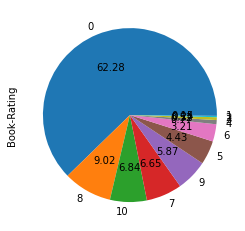

In [15]:
data_ratings['Book-Rating'].value_counts().plot(kind='pie', autopct='%.2f')

In [16]:
data_ratings[data_ratings['Book-Rating']==10]

,User-ID,ISBN,Book-Rating
9,276745,342310538,10
30,276760,8440682697,10
61,276772,3499230933,10
62,276772,3596151465,10
85,276788,055310666X,10
...,...,...,...
1149743,276688,0836218655,10
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149777,276709,0515107662,10


In [17]:
data_ratings['User-ID'].where(data_ratings['Book-Rating'] == 10).value_counts()

98391.0     1437
11676.0     1287
76499.0      809
56399.0      804
153662.0     565
            ... 
109069.0       1
109079.0       1
109081.0       1
109084.0       1
276721.0       1
Name: User-ID, Length: 20511, dtype: int64

In [18]:
subject_user_list = data_ratings[(data_ratings['User-ID']==98391)].where(data_ratings['Book-Rating'] == 10).value_counts() 

In [19]:
subject_user_list

User-ID  ISBN        Book-Rating
98391.0  0060002077  10.0           1
         0743466780  10.0           1
         0743475739  10.0           1
         0743475542  10.0           1
         0743474309  10.0           1
                                   ..
         0385510438  10.0           1
         0385505914  10.0           1
         0385504209  10.0           1
         0385503040  10.0           1
         1932815082  10.0           1
Length: 1437, dtype: int64

In [20]:
subject_user_list_1 = data_ratings['ISBN'][(data_ratings['User-ID']==98391)].where(data_ratings['Book-Rating'] == 10).value_counts() 

In [21]:
len(subject_user_list_1)

1437

In [22]:
type(subject_user_list_1)

pandas.core.series.Series

In [23]:
df = subject_user_list_1.to_frame()
df.index[0]

'0060002077'

In [24]:
isbn_list = []
for i in range(len(subject_user_list)):
    isbn_list.append(df.index[i])
isbn_list

['0060002077',
 '0743466780',
 '0743475739',
 '0743475542',
 '0743474309',
 '0743471873',
 '0743471652',
 '074347158X',
 '0743471547',
 '0743471431',
 '0743471415',
 '0743471113',
 '074347046X',
 '0743470362',
 '0743470346',
 '0743470095',
 '0743469941',
 '0743467639',
 '0743467604',
 '0743467582',
 '0743467566',
 '074347628X',
 '0743476980',
 '0743477146',
 '0743485068',
 '0756401399',
 '0756401275',
 '0756401224',
 '0756400805',
 '0756400783',
 '0743493729',
 '0743493508',
 '0743488164',
 '0743484797',
 '0743477243',
 '0743483561',
 '0743483219',
 '0743482263',
 '0743482069',
 '0743480511',
 '0743478967',
 '0743477316',
 '0743477251',
 '0743467426',
 '0743466608',
 '075640147X',
 '0743466497',
 '0743454405',
 '0743453956',
 '0743452887',
 '0743449002',
 '0743446534',
 '0743446291',
 '0743446054',
 '0743444477',
 '0743443969',
 '0743443950',
 '0743443721',
 '0743442733',
 '0743437527',
 '0743436040',
 '0743428625',
 '074342798X',
 '0743427300',
 '074342364X',
 '0743423615',
 '07434561

In [25]:
len(isbn_list)

1437

In [26]:
data_books['ISBN'][0]

'0195153448'

In [27]:
#Books that were rated 10 by user_Id = 98391.0
book_names = []
for i in range(len(data_books)):
    if data_books['ISBN'][i] in isbn_list:
        book_names.append(data_books['Book-Title'][i])
len(book_names)

1435

In [28]:
len(book_names)

1435

In [29]:
non = set(book_names)
len(non)

1435

# Popularity Based Recommender System

In [30]:
ratings = data_ratings.merge(data_books, on='ISBN')
#merging data_ratings and data_books on ISBN

In [33]:
#grouping on booktitle to calculate avg rating and total books with more than 250 votes
num_rating = ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns={'Book-Rating':'num_rating'},inplace=True)
num_rating

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [34]:
avg_rating = ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [57]:
all_books = num_rating.merge(avg_rating,on='Book-Title')
all_books

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [60]:
# top 50 rated books that has voting count above 180
popular = all_books[all_books['num_rating']>=180].sort_values('avg_rating',ascending=False).head(50)
popular

(50, 3)

In [63]:
popular_1 = popular.merge(data_books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_rating','avg_rating']]

In [66]:
popular_1

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...,249,5.409639
17,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
20,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
21,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
30,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
32,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769


# Collaborative Filtering Based Recommender System


In [205]:
votes = ratings.groupby('User-ID').count()['Book-Rating'] > 100
exp_users = votes[votes].index

In [206]:
filtered_rating = ratings[ratings['User-ID'].isin(exp_users)]

In [207]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
14,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031115,276680,0812881311,0,Streets of Gold,Evan Hunter,1985,Madison Books,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...
1031116,276680,0865055041,0,Kitchen (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...
1031117,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...
1031118,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...


In [208]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [209]:
#These books have been rated by more than 50 exp voters 
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1070)

In [210]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [211]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
67,8253,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...
1029756,274004,037572799X,0,In Pursuit of the Proper Sinner,Elizabeth George,2000,Random House Large Print Publishing,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...
1030363,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...


In [212]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
pt

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
from sklearn.metrics.pairwise import cosine_similarity

In [214]:
similarity_scores = cosine_similarity(pt)

In [215]:
similarity_scores.shape

(1070, 1070)

In [216]:
similarity_scores

array([[1.        , 0.06550754, 0.09317747, ..., 0.07547772, 0.05810769,
        0.03029366],
       [0.06550754, 1.        , 0.02247675, ..., 0.04739871, 0.13548709,
        0.12388301],
       [0.09317747, 0.02247675, 1.        , ..., 0.09310325, 0.        ,
        0.        ],
       ...,
       [0.07547772, 0.04739871, 0.09310325, ..., 1.        , 0.05583662,
        0.0137213 ],
       [0.05810769, 0.13548709, 0.        , ..., 0.05583662, 1.        ,
        0.09410287],
       [0.03029366, 0.12388301, 0.        , ..., 0.0137213 , 0.09410287,
        1.        ]])

In [217]:
np.where(pt.index=='Zoya')[0][0]

1068

In [245]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    data = []
    for i in similar_items:
        item = []
        temp_df = data_books[data_books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
    
    return data

In [246]:
recommend('The Fellowship of the Ring (The Lord of the Rings, Part 1)')

[['The Two Towers (The Lord of the Rings, Part 2)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg'],
 ['The Return of the King (The Lord of the Rings, Part 3)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339738.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg']]

In [234]:
popular_1['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [235]:
import pickle

In [236]:
#pickle.dump(popular_1, open('popular.pkl', 'wb'))

In [244]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(data_books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [237]:
popular_1.head()

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...,249,5.409639


In [238]:
popular['avg_rating'].values

array([5.85280374, 5.82428941, 5.73741007, 5.50144092, 5.40963855,
       5.18345324, 5.00711744, 4.94836957, 4.89565217, 4.88076923,
       4.7       , 4.64253898, 4.55116279, 4.54565702, 4.49763033,
       4.46872587, 4.45853659, 4.45422535, 4.45059289, 4.4490566 ,
       4.44702842, 4.35689046, 4.35496957, 4.33471646, 4.33185841,
       4.32835821, 4.32786885, 4.30729167, 4.28955224, 4.28909953,
       4.27467811, 4.27380952, 4.26405868, 4.24390244, 4.21863118,
       4.21782178, 4.17314488, 4.15816327, 4.12444444, 4.10762332,
       4.10598291, 4.09818182, 4.08885542, 4.0874036 , 4.08679245,
       4.07526882, 4.05668016, 4.05510204, 4.03738318, 4.00662252])